In [1]:
# import the necessary packages
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

pathCustom = ['/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/ImageProcessing',
              '/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/SignalProcessing']
for ipath in pathCustom:
    if not(ipath in sys.path):
        print(f'Adding path:{ipath}')
        sys.path.append(ipath)

# import wedoimage as wedoimg
# from wedoimage import*
import wedoimage as wedoimg
import wedosignal as wedosig

Adding path:/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/ImageProcessing
Adding path:/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/SignalProcessing


(561, 600, 3)


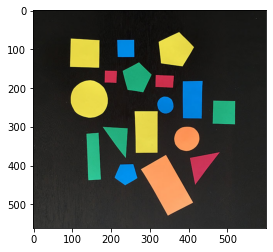

In [2]:
maxIntense = 255

flagRead=1 
# folderImg='/Users/pannawis/Projects/01_SmartMeter/images/BoxMeter_out_resnet'
folderImg='images'
folderSave = '/Users/pannawis/Projects/01_SmartMeter/images/FrameDigit_mitsu2_ju'
if not os.path.exists(folderSave):
    os.makedirs(folderSave)

# nameImg='1_IMG_20210530_164439.jpg'
nameImg='geometry_shape.jpg'

image=cv2.imread(os.path.join(folderImg,nameImg),flagRead)

# myMet=cv2.imread(r'/Users/pannawis/Projects/01_SmartMeter/images/RealEnviron/IMG_20210518_104256.jpg',flagRead)
print(image.shape)
wedoimg.imshowCV(image)


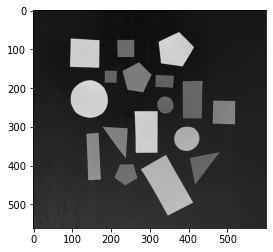

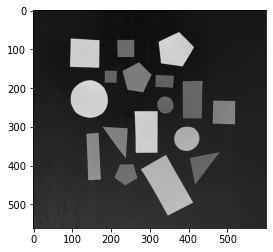

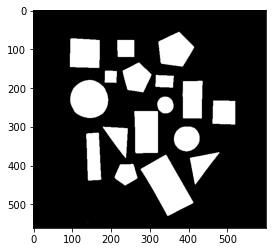

In [3]:
# to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
wedoimg.imshowCV(gray)

# filter image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
wedoimg.imshowCV(gray)

# threshold
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
wedoimg.imshowCV(thresh)

In [4]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# grabs the appropriate tuple value based on whether we are using OpenCV 2.4, 3, or 4.
cnts = imutils.grab_contours(cnts)

In [5]:
cv2.moments(cnts[3])
print(len(cnts[1]))

93


Can not divided by zero, skiping


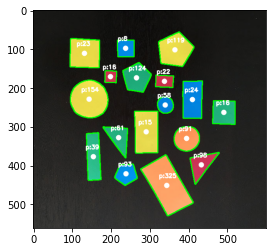

In [6]:
img2 = image
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    
    # print(len(M))

    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # draw the contour and center of the shape on the image
        cv2.drawContours(img2, [c], -1, (0, 255, 0), 2)

        # circle 
        cv2.circle(img2, (cX, cY), 7, (255, 255, 255), -1)
        
        # put text
        cv2.putText(img2, "p:" + str(len(c)), (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # show the image
        cv2.imshow("Image", img2)
        # cv2.waitKey(0)
        
    else:

        print("Can not divided by zero, skiping")

wedoimg.imshowCV(img2)

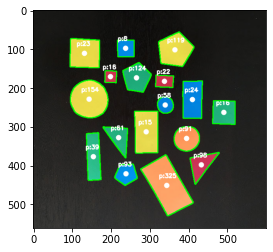

In [7]:
# draw the contour and center of the shape on the image
img3 = image
c = cnts[8]
cv2.drawContours(img3, [c], -1, (0, 255, 0), 2)
wedoimg.imshowCV(img3)

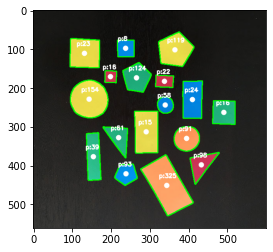

In [8]:
wedoimg.imshowCV(image)

## Scatter plot

In [ ]:
contour.get(3)

(0.0, 600.0)

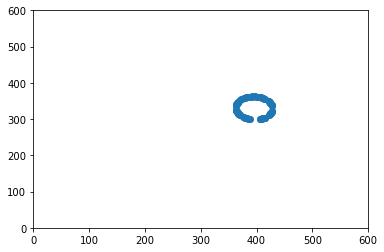

In [16]:
ishape = 5
c = cnts[ishape]
x = c[:,0,0]
y = c[:,0,1]
plt.scatter(x,y)
plt.xlim([0,600])
plt.ylim([0,600])

## asdf

In [ ]:
contour[0] = [ 1,2
               2,3 
               4,8]
contour[1] = [1,2 
              4,3]
contour[2] = []

In [10]:
approx

NameError: name 'approx' is not defined

210 268 396 451


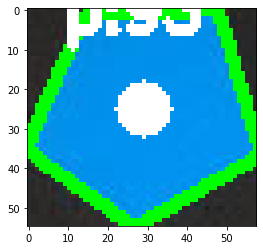

In [25]:
ishape = 1
percPeri = 10/100

c = cnts[ishape]
peri = cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, percPeri * peri, True)
area = cv2.contourArea(c)
nPoints = len(approx)

# from contour output
arrX = c[:,0,0]
arrY = c[:,0,1]

# from polyDP
# arrX = approx[:,0,0]
# arrY = approx[:,0,1]

xmin = min(arrX)
xmax = max(arrX)

ymin = min(arrY)
ymax = max(arrY)

print(xmin,xmax,ymin,ymax)
shapeImg = image[ymin:ymax,xmin:xmax]

wedoimg.imshowCV(shapeImg)